# Using package

In [7]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = np.array([[1], [2], [3], [4], [5]])
y = np.array([0, 0, 0, 1, 1])

model = LogisticRegression()

model.fit(X, y)

y_pred = model.predict(X)

print(f"prediction: {y_pred}")
print(f"accuracy: {accuracy_score(y, y_pred)}")
print(f"confujssion matrix: {confusion_matrix(y, y_pred)}")
print(f"classification report: {classification_report(y, y_pred)}")

prediction: [0 0 0 1 1]
accuracy: 1.0
confujssion matrix: [[3 0]
 [0 2]]
classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         2

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



# From Scratch

 30%|███       | 9/30 [00:11<00:26,  1.24s/it]


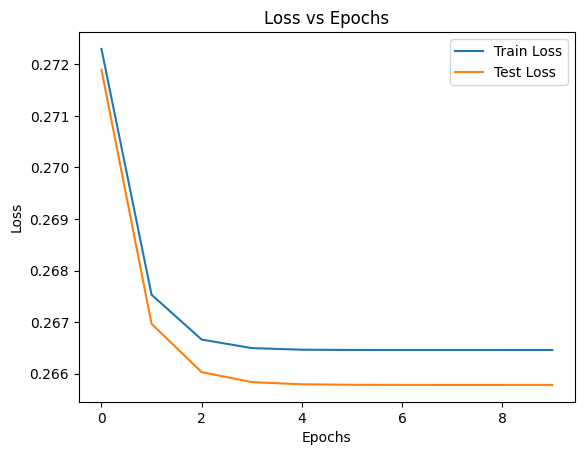

Weights: [-0.00825401  0.0075607  -0.00207471  0.00570453  0.00259962 -0.00038552
  0.01613882 -0.00408863  0.00730513 -0.0173125  -0.00677572  0.00782492
  0.00191422  0.00382049 -0.00219892]
Bias: 0.834446462860423


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Create a synthetic dataset from scratch
def create_classification_data(n_samples, n_features, n_informative, n_redundant, n_classes, weights, class_sep, random_state):
    np.random.seed(random_state)
    n_informative = min(n_features, n_informative)
    n_redundant = min(n_features - n_informative, n_redundant)

    informative = np.random.randn(n_samples, n_informative) * class_sep

    redundant = np.dot(informative, np.random.rand(n_informative, n_redundant))

    random_features = np.random.randn(n_samples, n_features - n_informative - n_redundant)

    X = np.hstack((informative, redundant, random_features))

    y = np.random.binomial(1, weights[0], size=n_samples)

    return X, y

# Train-test split
def train_test_split(X, y, test_size, random_state):
    np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    split = int(X.shape[0] * (1 - test_size))
    X_train = X[indices[:split]]
    y_train = y[indices[:split]]
    X_test = X[indices[split:]]
    y_test = y[indices[split:]]

    return X_train, X_test, y_train, y_test

# Initialize weights and bias
def initialize_weights(row_vector):
    w = np.zeros_like(row_vector)
    b = 0.0
    return w, b

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log loss function
def logloss(y_true, y_pred):
    n = y_true.shape[0]
    indi_loss = np.dot(y_true, np.log10(y_pred)) + np.dot((1 - y_true), np.log10(1 - y_pred))
    loss = (-1 / n) * np.sum(indi_loss)
    return loss

# Gradient calculations
def gradient_dw(x, y, w, b, alpha, N):
    dw = (x * (y - sigmoid(np.dot(w, x) + b))) - ((alpha / N) * w)
    return dw

def gradient_db(x, y, w, b):
    db = y - sigmoid(np.dot(w, x) + b)
    return db

def pred(w, b, X):
    N = len(X)
    predictions = []
    for i in range(N):
        z = np.dot(w, X[i]) + b
        predictions.append(sigmoid(z))
    return np.array(predictions)

# Training function
def train(X_train, y_train, X_test, y_test, epochs, alpha, eta0):
    train_loss = []
    test_loss = []
    w, b = initialize_weights(X_train[0])
    N = X_train.shape[0]

    for e in tqdm(range(epochs)):
        for i in range(X_train.shape[0]):
            dw = gradient_dw(X_train[i], y_train[i], w, b, alpha, N)
            db = gradient_db(X_train[i], y_train[i], w, b)
            w += eta0 * dw
            b += eta0 * db

        # Calculate losses
        y_train_pred = pred(w, b, X_train)
        tr_loss = logloss(y_train, y_train_pred)
        train_loss.append(tr_loss)

        y_test_pred = pred(w, b, X_test)
        te_loss = logloss(y_test, y_test_pred)
        test_loss.append(te_loss)

        # Early stopping
        if e > 0 and abs(tr_loss - train_loss[e - 1]) < 1e-7:
            break

    return w, b, train_loss, test_loss

# Create a dataset
X, y = create_classification_data(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                                  n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

# Train the model
alpha = 0.0001
eta0 = 0.0001
epochs = 30
w, b, train_loss, test_loss = train(X_train, y_train, X_test, y_test, epochs, alpha, eta0)

plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss vs Epochs')
plt.show()

print("Weights:", w)
print("Bias:", b)
